<a href="https://colab.research.google.com/github/ehtesham04/bigramNeuralNet/blob/main/bigrams_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:3]

['emma', 'olivia', 'ava']

In [ ]:
import torch

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
#create the training set of bigrams (x, y)
xs , ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

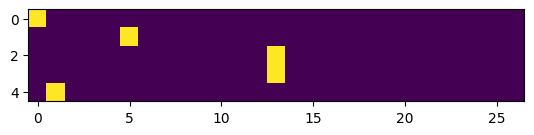

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

In [ ]:
xenc.shape

torch.Size([5, 27])

In [ ]:
xenc.dtype

torch.float32

In [ ]:
W = torch.randn((27, 1))

In [ ]:
(xenc @ W).shape

torch.Size([5, 1])

In [ ]:
# (5, 27) @ (27, 1) --> (5, 1)

In [ ]:
W = torch.randn((27, 27))
logits = xenc @ W #log-counts
counts = logits.exp() #equivalent to N  (counts matrix)
probs = counts / counts.sum(1, keepdim = True)
probs

tensor([[0.0100, 0.0416, 0.0323, 0.0244, 0.0779, 0.0258, 0.0149, 0.0291, 0.0226,
         0.0263, 0.0658, 0.0078, 0.0107, 0.0275, 0.0075, 0.1111, 0.0317, 0.0336,
         0.0585, 0.0103, 0.0183, 0.0723, 0.0902, 0.0069, 0.0276, 0.0876, 0.0277],
        [0.0137, 0.0260, 0.0396, 0.0124, 0.0076, 0.1005, 0.0018, 0.0096, 0.0129,
         0.0107, 0.0856, 0.0692, 0.0043, 0.0209, 0.0067, 0.0018, 0.0124, 0.2020,
         0.0824, 0.0584, 0.0253, 0.0189, 0.0248, 0.0089, 0.0148, 0.0074, 0.1213],
        [0.0114, 0.0114, 0.0399, 0.0265, 0.0155, 0.1127, 0.0223, 0.0037, 0.0352,
         0.0075, 0.0121, 0.0019, 0.0033, 0.0090, 0.0653, 0.0065, 0.0085, 0.1397,
         0.0039, 0.0607, 0.0089, 0.0388, 0.0325, 0.1507, 0.0493, 0.0424, 0.0805],
        [0.0114, 0.0114, 0.0399, 0.0265, 0.0155, 0.1127, 0.0223, 0.0037, 0.0352,
         0.0075, 0.0121, 0.0019, 0.0033, 0.0090, 0.0653, 0.0065, 0.0085, 0.1397,
         0.0039, 0.0607, 0.0089, 0.0388, 0.0325, 0.1507, 0.0493, 0.0424, 0.0805],
        [0.0069, 0.0136,

In [ ]:
(xenc @ W).shape

torch.Size([5, 27])

In [ ]:
probs[0]

tensor([0.0100, 0.0416, 0.0323, 0.0244, 0.0779, 0.0258, 0.0149, 0.0291, 0.0226,
        0.0263, 0.0658, 0.0078, 0.0107, 0.0275, 0.0075, 0.1111, 0.0317, 0.0336,
        0.0585, 0.0103, 0.0183, 0.0723, 0.0902, 0.0069, 0.0276, 0.0876, 0.0277])

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g)

In [ ]:
xenc = F.one_hot(xs, num_classes = 27).float()  #vectorize the indexed input
logits = xenc @ W       #soft-
counts = logits.exp()   #-max
probs = counts / counts.sum(1, keepdims = True)   #normalizing the probabib

In [ ]:
probs.shape

torch.Size([5, 27])

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

3.7693049907684326


In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448
2.509854555130005
2.5089924335479736
2.5081682205200195
2.507380485534668


In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [ ]:
p.shape

torch.Size([1, 27])